# Exploratory Data Analysis – E-commerce Fraud Data

## Business Context
This notebook explores e-commerce transaction data to understand patterns associated with fraudulent behavior. The goal is to analyze user behavior, transaction timing, and transaction characteristics to inform feature engineering and model design.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/raw/Fraud_Data.csv")
df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
df.shape


(151112, 11)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [ ]:
df.describe()


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


The dataset contains user-level, transaction-level, and device-level features. The target variable is `class`, where 1 indicates fraud and 0 indicates a legitimate transaction.


In [ ]:
df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates()


Duplicate transactions were removed to avoid biasing the model toward repeated patterns and to ensure each transaction is treated independently.


In [ ]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])


Datetime conversion enables time-based feature extraction, which is critical in fraud detection since fraudulent behavior often depends on transaction timing.


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


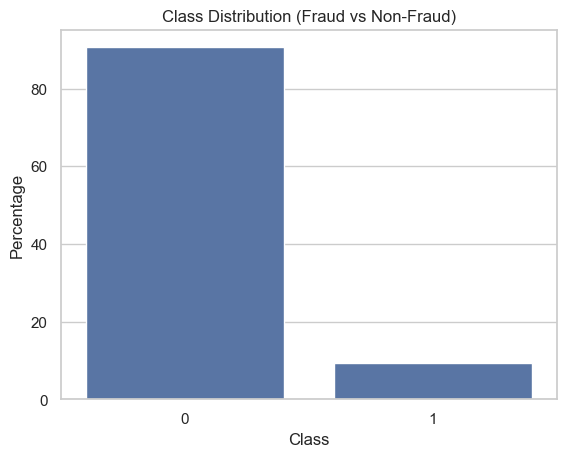

In [ ]:
class_dist = df['class'].value_counts(normalize=True) * 100
print(class_dist) 

sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.ylabel("Percentage")
plt.xlabel("Class")
plt.show()

The dataset is highly imbalanced, with fraudulent transactions representing a very small fraction of the data.  
Therefore, accuracy is not an appropriate evaluation metric for this problem.


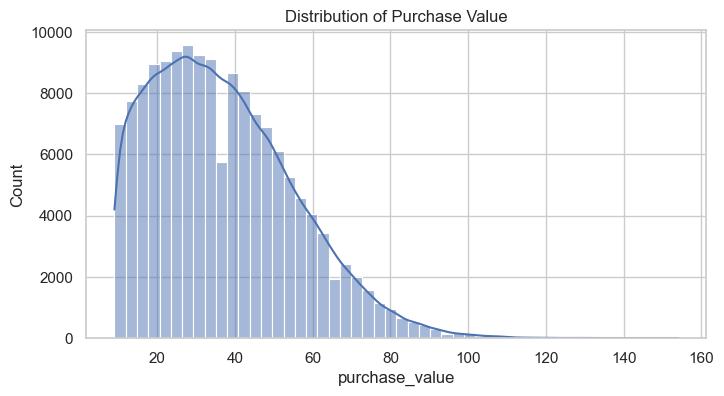

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()


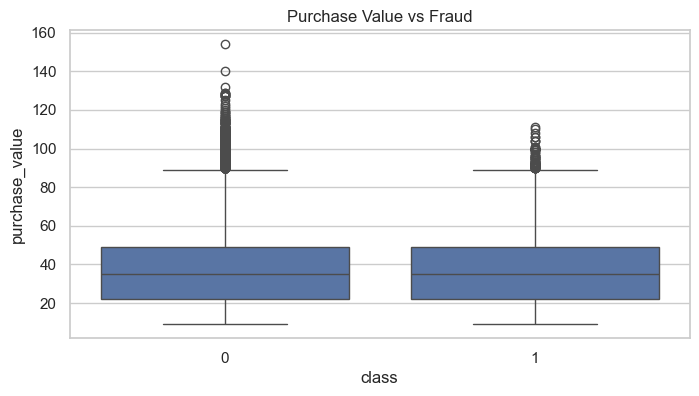

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title("Purchase Value vs Fraud")
plt.show()


### Key Insights
- Fraudulent transactions are rare, reflecting real-world scenarios.
- Fraudulent purchases tend to show different value distributions.
- Transaction behavior must be analyzed beyond static user attributes.
